In [1]:
# Question: Combining Multiple Outlier Detection Methods
# Description: Combine Z-score, IQR, and Boxplot methods to detect and compare outliers in adataset.




Original DataFrame with potential outliers:
     Value
0      20
1      22
2      25
3      23
4      21
5      75
6      24
7      26
8      28
9      10
10     90
11     27
12     29
13     31
14    -10

DataFrame with Z-scores:
     Value    ZScore  Is_Outlier_ZScore
0      20  0.406890              False
1      22  0.320317              False
2      25  0.190459              False
3      23  0.277031              False
4      21  0.363603              False
5      75  1.973847              False
6      24  0.233745              False
7      26  0.147173              False
8      28  0.060601              False
9      10  0.839751              False
10     90  2.623139               True
11     27  0.103887              False
12     29  0.017314              False
13     31  0.069258              False
14    -10  1.705473              False

Outliers detected by Z-score (threshold=2):
     Value    ZScore  Is_Outlier_ZScore
10     90  2.623139               True

DataFrame with IQR 

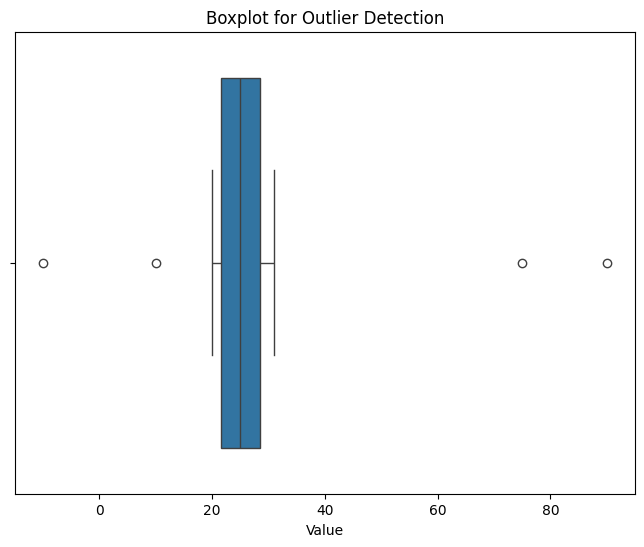


Comparison of Outliers Detected by Different Methods:
     Value  Is_Outlier_ZScore  Is_Outlier_IQR
0      20              False           False
1      22              False           False
2      25              False           False
3      23              False           False
4      21              False           False
5      75              False            True
6      24              False           False
7      26              False           False
8      28              False           False
9      10              False            True
10     90               True            True
11     27              False           False
12     29              False           False
13     31              False           False
14    -10              False            True

Number of outliers detected by Z-score: 1
Number of outliers detected by IQR: 4

Data points flagged as outliers by at least one method:
     Value  Is_Outlier_ZScore  Is_Outlier_IQR
5      75              False            

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Create a DataFrame with potential outliers
data_combined_outliers = {'Value': [20, 22, 25, 23, 21, 75, 24, 26, 28, 10, 90, 27, 29, 31, -10]}
df_combined = pd.DataFrame(data_combined_outliers)

print("Original DataFrame with potential outliers:\n", df_combined)

# 2. Z-score Method
df_zscore = df_combined.copy()
df_zscore['ZScore'] = np.abs(stats.zscore(df_zscore['Value']))
threshold_z = 2  # Common threshold
df_zscore['Is_Outlier_ZScore'] = df_zscore['ZScore'] > threshold_z
print("\nDataFrame with Z-scores:\n", df_zscore)
print("\nOutliers detected by Z-score (threshold={}):\n".format(threshold_z), df_zscore[df_zscore['Is_Outlier_ZScore']])

# 3. IQR Method
df_iqr = df_combined.copy()
Q1 = df_iqr['Value'].quantile(0.25)
Q3 = df_iqr['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
df_iqr['Is_Outlier_IQR'] = (df_iqr['Value'] < lower_bound_iqr) | (df_iqr['Value'] > upper_bound_iqr)
print("\nDataFrame with IQR outlier flags:\n", df_iqr)
print("\nOutliers detected by IQR:\n", df_iqr[df_iqr['Is_Outlier_IQR']])

# 4. Boxplot Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_combined['Value'])
plt.title('Boxplot for Outlier Detection')
plt.xlabel('Value')
plt.show()

# 5. Comparing Outliers from Different Methods
df_comparison = pd.concat([df_combined['Value'], df_zscore['Is_Outlier_ZScore'], df_iqr['Is_Outlier_IQR']], axis=1)
print("\nComparison of Outliers Detected by Different Methods:\n", df_comparison)

# Counting the number of outliers detected by each method
print("\nNumber of outliers detected by Z-score:", df_zscore['Is_Outlier_ZScore'].sum())
print("Number of outliers detected by IQR:", df_iqr['Is_Outlier_IQR'].sum())

# Identifying data points flagged as outliers by at least one method
df_all_outliers = df_comparison[(df_comparison['Is_Outlier_ZScore']) | (df_comparison['Is_Outlier_IQR'])]
print("\nData points flagged as outliers by at least one method:\n", df_all_outliers)